In [1]:
# 예제 리스트
dict_list = [
    {'id': 1, 'value': 'A'},
    {'id': 2, 'value': 'B'},
    {'id': 1, 'value': 'C'},
    {'id': 3, 'value': 'D'},
    {'id': 1, 'value': 'E'}
]

# 특정 키의 값
key = 'id'
value_to_find = 1

# 해당 키의 값을 가진 모든 딕셔너리 추출
filtered_dicts = [d for d in dict_list if d.get(key) == value_to_find]

# 결과 출력
print(filtered_dicts)


[{'id': 1, 'value': 'A'}, {'id': 1, 'value': 'C'}, {'id': 1, 'value': 'E'}]


In [2]:
# 예제 results 리스트
results = [
    {'image_id': 1, 'category_id': 2, 'bbox': [10, 20, 30, 40], 'score': 0.95},
    {'image_id': 2, 'category_id': 3, 'bbox': [15, 25, 35, 45], 'score': 0.85},
    {'image_id': 1, 'category_id': 4, 'bbox': [12, 22, 32, 42], 'score': 0.90},
    {'image_id': 3, 'category_id': 2, 'bbox': [14, 24, 34, 44], 'score': 0.80},
    {'image_id': 2, 'category_id': 3, 'bbox': [16, 26, 36, 46], 'score': 0.75}
]

# 중복되지 않는 image_id 값을 추출
unique_image_ids = list({item['image_id'] for item in results})

# 결과 출력
print(unique_image_ids)


[1, 2, 3]


In [15]:
import json

# COCO 어노테이션 파일 경로
annotation_file = '/home/hwkang/jupyter/root/dataset/COCO2017/annotations/instances_train2017.json'

# 어노테이션 파일 읽기
with open(annotation_file, 'r') as f:
    coco_data = json.load(f)

# 모든 bbox의 너비와 높이를 저장할 리스트
bbox_dimensions = []

# 어노테이션에서 bbox 추출
for annotation in coco_data['annotations']:
    bbox = annotation['bbox']  # [x, y, width, height]
    x_min = bbox[0]
    y_min = bbox[1]
    width = bbox[2]
    height = bbox[3]
    bbox_dimensions.append((x_min, y_min, width, height))

# 결과 확인
#print(bbox_dimensions[:10])  # 첫 10개 bbox의 너비와 높이 출력

[(199.84, 200.46, 77.71, 70.88), (234.22, 317.11, 149.39, 38.55), (239.48, 347.87, 160.0, 57.81), (296.65, 388.33, 1.03, 0.0), (251.87, 333.42, 125.94, 22.71), (337.02, 244.46, 66.47, 66.75), (213.81, 192.39, 53.94, 70.28), (324.66, 247.92, 250.87, 181.02), (260.18, 252.76, 67.91, 53.3), (61.87, 276.25, 296.42, 103.18)]


In [17]:
# 너비를 기준으로 오름차순 정렬
sorted_bbox_dimensions = sorted(bbox_dimensions, key=lambda x: x[2])

# 상위 10개의 원소 출력
top_10_sorted = sorted_bbox_dimensions[:4]
print(top_10_sorted)

[(287.89, 241.35, 0.23, 3.64), (345.23, 264.38, 0.57, 2.5), (327.64, 145.74, 0.68, 30.3), (197.15, 228.72, 0.68, 4.79), (200.14, 292.98, 0.7, 3.02), (473.24, 195.09, 0.71, 4.64), (613.09, 26.32, 0.72, 5.55), (262.17, 57.18, 0.83, 6.41), (224.02, 106.97, 0.85, 2.89), (271.95, 30.15, 0.86, 5.71)]


In [18]:
# 너비를 기준으로 오름차순 정렬
sorted_bbox_dimensions = sorted(bbox_dimensions, key=lambda x: x[3])

# 상위 10개의 원소 출력
top_10_sorted = sorted_bbox_dimensions[:4]
print(top_10_sorted)

[(296.65, 388.33, 1.03, 0.0), (9.98, 188.56, 5.54, 0.0), (417.97, 322.32, 3.55, 0.34), (304.86, 81.83, 12.38, 0.34), (521.79, 195.16, 4.88, 0.5), (602.34, 48.02, 2.58, 0.68), (604.88, 172.94, 6.71, 0.7), (176.47, 198.88, 5.39, 0.7), (143.77, 174.92, 10.06, 0.76), (538.94, 347.76, 3.84, 0.77)]


In [ ]:
from pycocotools.coco import COCO
from collections import Counter
import matplotlib.pyplot as plt

# COCO 어노테이션 파일 로드
ann_file = '/home/hwkang/jupyter/root/dataset/COCO2017/annotations/instances_val2017.json'
coco = COCO(ann_file)

# 모든 어노테이션 ID 가져오기
ann_ids = coco.getAnnIds()
anns = coco.loadAnns(ann_ids)

# 각 어노테이션의 카테고리 ID 수집
category_ids = [ann['category_id'] for ann in anns]

# 라벨의 빈도 계산
label_distribution = dict(sorted(Counter(category_ids).items()))

# 라벨 분포 시각화
labels = list(label_distribution.keys())
frequencies = list(label_distribution.values())

In [23]:
for label, freq in label_distribution.items():
    if freq <= 10:
        print(f"Category ID: {label}, Frequency: {freq}")

Category ID: 80, Frequency: 9


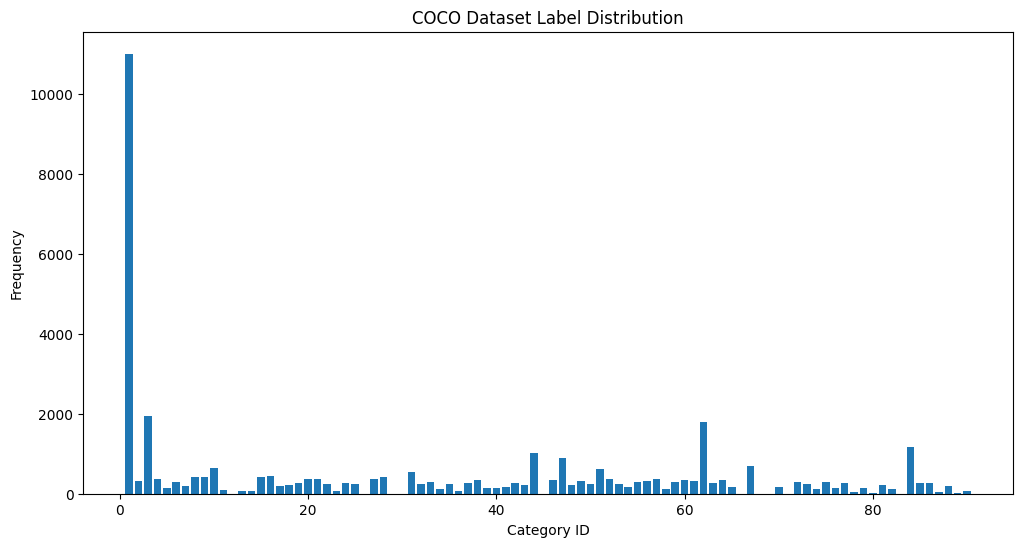

In [25]:
plt.figure(figsize=(12, 6))
plt.bar(labels, frequencies)
plt.xlabel('Category ID')
plt.ylabel('Frequency')
plt.title('COCO Dataset Label Distribution')
plt.show()